In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('seastar1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,950,950)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = np.where((mask==0)|(mask==2),1,0).astype('uint8')
im=img.copy()
img = img*mask2[:,:,np.newaxis]
cv2.rectangle(img,(50,50),(970,930),(0,255,0),3)
im=im*mask3[:,:,np.newaxis]

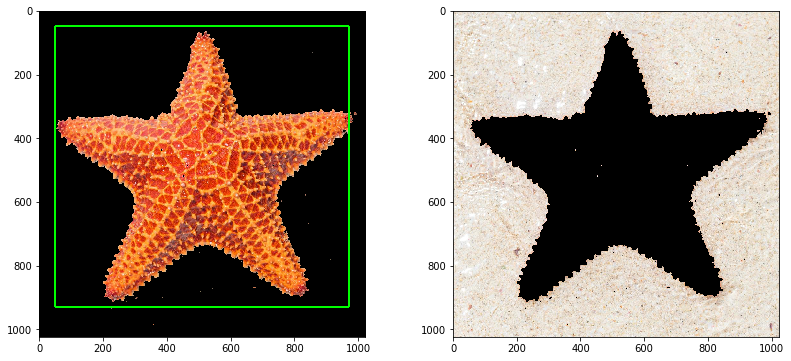

In [3]:
plt.figure(figsize=(21,6))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(im)
plt.show()

In [4]:
img = cv2.imread('seastar1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im=img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fg = cv2.erode(thresh,None,iterations = 29)
bgt = cv2.dilate(thresh,None,iterations = 3)
ret,bg = cv2.threshold(bgt,1,1,1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(img,marker32)
m = cv2.convertScaleAbs(marker32)
ret,thresh = cv2.threshold(m,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
res = cv2.bitwise_and(img,img,mask = thresh)
mas=np.array(thresh)
mask2 = np.where((mas==255),0,1).astype('uint8')
mask3 = np.where((mas==255),1,0).astype('uint8')
img = img*mask2[:,:,np.newaxis]
im=im*mask3[:,:,np.newaxis]

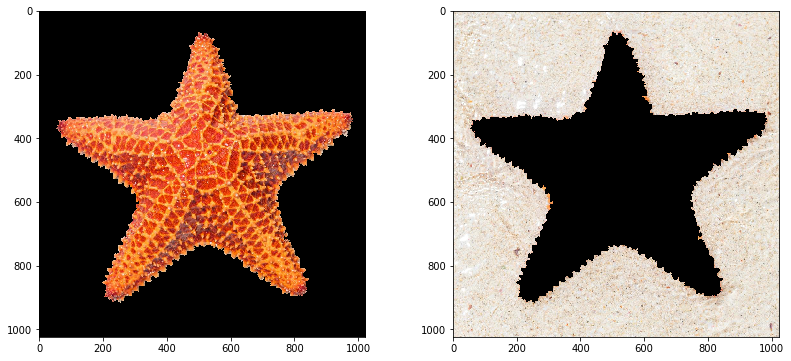

In [5]:
plt.figure(figsize=(21,6))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(im)
plt.show()